In [2]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model

In [1]:
%load_ext autoreload
import sys
if not '/home/nlarusstone/cf_fba' in sys.path:
    sys.path.append('/home/nlarusstone/cf_fba')
import src.utils as utils
import src.flux_sample as fs
import src.create_dataset as dataset
from src.get_test_data import get_test_data
import src.cf_io as cf_io
import src.plotting as plotting
%autoreload 2

/home/nlarusstone/.virtualenvs/nls/lib/python2.7/site-packages/h5py/__init__.py:36 FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
Using TensorFlow backend.


In [31]:
latent_dim = 10
use_corr = True
froot = 'hand'
txtl = False
resamp = True
layer_szs = [1024, 1024, 1024]

In [32]:
df = cf_io.get_exp_data('manual')
df.head()

(1591, 38)


,mdx,pi,nts,k,OUT
index,,,,,
0,0.0,0.0,1.0,0.0,0.566331
1,0.0,1.0,0.0,0.0,0.523761
2,1.0,0.0,0.0,0.0,0.589774
3,0.0,0.5,0.5,0.0,0.969988
4,0.5,0.0,0.5,0.0,0.758090


In [33]:
encoder, generator, X_test, y_test, obj_col, cols, y_vals_d, test_enc, test_dec = cf_io.get_test_data(
    froot, txtl, resamp, latent_dim, layer_szs, use_corr=True)

Load models ../models/encoder_epochs=200_batch=256_dimension=10_corr=True_scale=flux_zero_froot=hand_txtl=False_nlayers=3_resamp=True_lastlayer=1024.h5
Read in data from ../data/hand_stacked_fluxes
Encoded data
Decoded data


In [34]:
froot = 'karim'
layer_szs = [1024, 1024, 1024]
encoder_e, generator_e, X_test_e, y_test_e, obj_col_e, cols_e, y_vals_d_e, test_enc_e, test_dec_e = cf_io.get_test_data(
    froot, txtl, resamp, latent_dim, layer_szs, use_corr=True)

Load models ../models/encoder_epochs=200_batch=256_dimension=10_corr=True_scale=flux_zero_froot=karim_txtl=False_nlayers=3_resamp=True_lastlayer=1024.h5
Read in data from ../data/karim_stacked_fluxes
Encoded data
Decoded data


In [35]:
df_e = cf_io.get_exp_data('karim')
df_e.head()

,mg2,nh4,k,glc__D,pi,nad,atp,coa,OUT
0,8.0,10.0,134,0,10,0.5,0.0,0.5,0.000000
1,8.0,10.0,134,200,10,0.0,0.0,0.5,0.000000
2,8.0,10.0,134,200,10,0.5,0.0,2.0,0.000000
3,8.0,10.0,134,200,10,0.5,0.0,1.6,0.000000
4,8.0,10.0,134,200,10,0.5,2.0,0.5,0.039648


In [41]:
from sklearn.manifold import TSNE
def tsne_trans(enc, n_experiments):
    tsne = TSNE(n_components=2, verbose=True)
    test_enc_sm = enc[0:1000, :, :]
    test_enc_l_2d = test_enc_sm.reshape(test_enc_sm.shape[0] * test_enc_sm.shape[1], test_enc_sm.shape[2])
    tsne_enc_l = tsne.fit_transform(test_enc_l_2d)
    col = np.array(range(n_experiments) * (tsne_enc_l.shape[0] / n_experiments))
    return tsne_enc_l, col
tsne_enc = tsne_trans(test_enc, df.shape[0])
tsne_enc_e = tsne_trans(test_enc_e, df_e.shape[0])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17000 samples in 0.019s...
[t-SNE] Computed neighbors for 17000 samples in 1.776s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17000
[t-SNE] Computed conditional probabilities for sample 2000 / 17000
[t-SNE] Computed conditional probabilities for sample 3000 / 17000
[t-SNE] Computed conditional probabilities for sample 4000 / 17000
[t-SNE] Computed conditional probabilities for sample 5000 / 17000
[t-SNE] Computed conditional probabilities for sample 6000 / 17000
[t-SNE] Computed conditional probabilities for sample 7000 / 17000
[t-SNE] Computed conditional probabilities for sample 8000 / 17000
[t-SNE] Computed conditional probabilities for sample 9000 / 17000
[t-SNE] Computed conditional probabilities for sample 10000 / 17000
[t-SNE] Computed conditional probabilities for sample 11000 / 17000
[t-SNE] Computed conditional probabilities for sample 12000 / 17000
[t-SNE] Computed conditional probabilities for sam

Plot d_1 vs d_2
Plot d_1 vs d_2


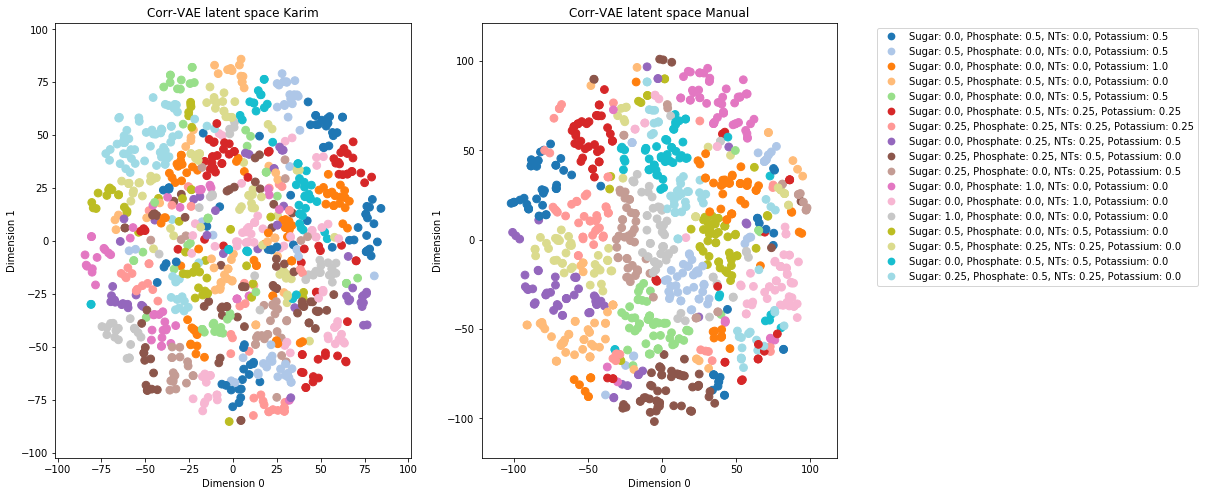

In [49]:
fig, axarr = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
plotting.plt_latent_space(tsne_enc_e[0], df_e, axarr[0], flat=True, y_test=tsne_enc_e[1], samp_range=2000, legend=False)
axarr[0].set_title('Corr-VAE latent space Karim')
plotting.plt_latent_space(tsne_enc[0], df, axarr[1], flat=True, y_test=tsne_enc[1], samp_range=1000, legend=True)
axarr[1].set_title('Corr-VAE latent space Manual')
plt.show()

In [82]:
import matplotlib as mpl
from matplotlib import cm

In [94]:
cmap1 = cm.get_cmap('tab20c', 40)
cmap2 = cm.get_cmap('tab20b', 20)

In [95]:
cmap1.colors[20:] = cmap2.colors

Plot d_1 vs d_2


Text(0.5,1,'Corr-VAE latent space Karim')

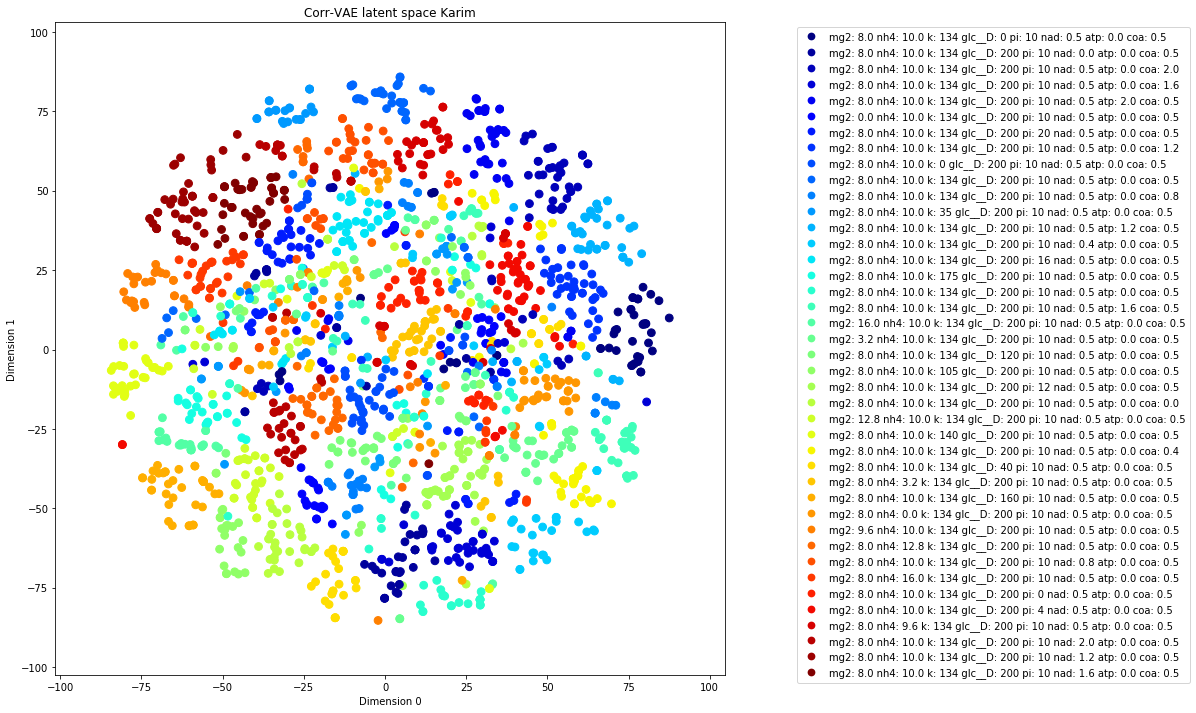

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 12))
plotting.plt_latent_space(tsne_enc_e[0], df_e, ax, flat=True, y_test=tsne_enc_e[1], samp_range=2000, legend=True,
                        color_scheme='jet')
#plt.cm = cmap1
ax.set_title('Corr-VAE latent space Karim')

In [57]:
k = 0

In [67]:
' '.join([col + ': {0}'.format(df_e.iloc[k, col_i]) for col_i, col in enumerate(df_e.columns[:-1])])

'mg2: 8.0 nh4: 10.0 k: 134 glc__D: 0 pi: 10 nad: 0.5 atp: 0.0 coa: 0.5'

In [58]:
'Sugar: {0}, Phosphate: {1}, NTs: {2}, Potassium: {3}'.format(
                                    df_e.iloc[k, 0], df_e.iloc[k, 1], df_e.iloc[k, 2], df_e.iloc[k, 3])

'Sugar: 8.0, Phosphate: 10.0, NTs: 134, Potassium: 0'

In [ ]:
#11_epochs=200_batch=256_dimension=2_corr=False_scale=flux_zero_froot=hand_txtl=True_nlayers=3_resamp=True_lastlayer=1024.h5

In [ ]:
layer_szs = [1024, 1024, 1024]
cf_io.get_test_data(froot, txtl, resamp, latent_dim, layer_szs, use_corr=False, resamp=True)
11_epochs=200_batch=256_dimension=2_corr=False_scale=flux_zero_froot=hand_txtl=True_nlayers=3_resamp=True_lastlayer=1024_11.h5

In [26]:
flat = False